# Esperienza 2
## Misura della focale di una lente divergente sottile
#### Tutte le misure sono in millimetri

In [1]:
import numpy as np
import pandas as pd
import xarray as xr

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
graph_default_size = (8,3.5)
graph_default_dpi = 200
graph_base_name = './grafici/graph_'

style = ['white', 'dark', 'whitegrid', 'darkgrid', 'ticks'][2]
sns.set_style(style)

In [3]:
pd_data_main = pd.read_csv('data_main.txt', sep='\t', dtype='str,float64,float64', comment='#')

In [4]:
pd_data_main

,obj,val,err
0,d,4.0,0.01
1,D,10.0,0.01
2,D1_D,10.0,0.01
3,D4_D1,2.5,0.01
4,D4_D2,14.0,0.01
5,n_lente,22.0,NaN
6,dr,5.7,0.00
7,sorgente,135.5,0.25
8,collimatore,212.5,0.25
9,lente,320.0,0.25


In [5]:
get_main= lambda obj: (pd_data_main.loc[pd_data_main['obj'] == obj].iloc[0,1], pd_data_main.loc[pd_data_main['obj'] == obj].iloc[0,2])

In [6]:
def get_main(obj):
    row = pd_data_main.loc[pd_data_main['obj'] == obj]
    return (row.iloc[0,1], row.iloc[0,2], 3*row.iloc[0,2])

In [7]:
# Distanza sorgenti mascherina oggetto dimensionato
d, d_sig, d_Dlt = get_main('d')


# Distanza tra i due fori del diaframma con foro centrale
D1_D, D1_D_sig, D1_D_Dlt = get_main('D1_D')


# Distanza tra i due fori parassiali del diaframma a 4 fori
D4_D1, D4_D1_sig, D4_D1_Dlt = get_main('D4_D1')

# Distanza tra i due fori marginali del diagramma a 4 fori
D4_D2, D4_D2_sig, D4_D2_Dlt = get_main('D4_D2')


# Numero lente
lente_n, _, _ = get_main('n_lente')

# Spessore di montaggio della lente
lente_dr, _, _ = get_main('dr')


# Posizione della sorgente misurata con cavalliere posizionatore
pos_sorgente, pos_sorgente_sig, pos_sorgente_Dlt = get_main('sorgente')

# Posizione del collimatore
pos_coll, pos_coll_sig, pos_coll_Dlt = get_main('collimatore')

# Posizione della lente
pos_lente, pos_lente_sig, pos_lente_Dlt = get_main('lente')

In [8]:
# Errore posizione dello schermo 
h_sig, h_Dlt = 0.5, 1.5

In [9]:
pd_data = pd.read_csv('data.txt', sep='\t', dtype='float64,float64,float64,str', comment='#')

In [10]:
ds = xr.Dataset(
    data_vars=dict(
        sx=(['op', 'h', 'n'], np.stack([
            np.split(pd_data['sx'].to_numpy(), 20)[::2],
            np.split(pd_data['sx'].to_numpy(), 20)[1::2]
            ])),
        dx=(['op', 'h', 'n'], np.stack([
            np.split(pd_data['dx'].to_numpy(), 20)[::2],
            np.split(pd_data['dx'].to_numpy(), 20)[1::2]
            ]))
    ),
    coords=dict(
        n=('n', range(5)),
        h=('h', pd_data['h'].unique() - pos_lente),
        op=('op', ['L', 'F'])
    )
)

In [11]:
ds

<xarray.Dataset>
Dimensions:  (op: 2, h: 10, n: 5)
Coordinates:
  * n        (n) int64 0 1 2 3 4
  * h        (h) float64 60.0 110.0 160.0 210.0 ... 360.0 410.0 460.0 510.0
  * op       (op) <U1 'L' 'F'
Data variables:
    sx       (op, h, n) float64 3.64 3.49 3.52 3.45 3.49 ... 4.34 4.36 4.44 4.8
    dx       (op, h, n) float64 19.13 19.19 19.22 19.22 ... 65.99 65.9 65.76

In [12]:
da_k = ds.dx-ds.sx

In [13]:
da_k

<xarray.DataArray (op: 2, h: 10, n: 5)>
array([[[15.49, 15.7 , 15.7 , 15.77, 15.72],
        [21.04, 21.  , 21.05, 21.08, 21.  ],
        [25.95, 26.06, 26.13, 25.73, 25.88],
        [31.12, 30.93, 30.97, 31.09, 30.87],
        [36.06, 36.03, 35.79, 36.03, 35.94],
        [42.09, 40.87, 40.67, 40.65, 40.93],
        [45.89, 45.84, 45.77, 45.87, 45.77],
        [50.54, 51.01, 50.35, 50.01, 50.03],
        [56.  , 55.6 , 55.74, 55.65, 55.99],
        [60.54, 60.16, 60.58, 60.58, 60.42]],

       [[15.46, 15.49, 15.52, 15.44, 15.55],
        [20.78, 20.72, 21.01, 20.92, 20.88],
        [25.81, 25.81, 25.87, 25.92, 25.92],
        [31.12, 31.13, 31.25, 31.07, 31.11],
        [35.78, 36.27, 35.96, 36.2 , 36.05],
        [40.99, 41.31, 41.22, 41.63, 40.93],
        [46.35, 46.15, 45.92, 46.13, 45.91],
        [51.08, 51.45, 51.52, 51.5 , 51.12],
        [56.95, 56.45, 56.53, 57.45, 56.95],
        [61.56, 61.64, 61.63, 61.46, 60.96]]])
Coordinates:
  * n        (n) int64 0 1 2 3 4
  * h        (h) float64 60.0 110.0 160.0 210.0 ... 360.0 410.0 460.0 510.0
  * op       (op) <U1 'L' 'F'

In [14]:
ki = da_k.mean(dim=['n','op'])

ki

<xarray.DataArray (h: 10)>
array([15.584, 20.948, 25.908, 31.066, 36.011, 41.129, 45.96 , 50.861,
       56.331, 60.953])
Coordinates:
  * h        (h) float64 60.0 110.0 160.0 210.0 ... 360.0 410.0 460.0 510.0

In [15]:
ki_sig = (((da_k - ki) ** 2).sum(dim=['n','op']) / 10) ** .5

ki_sig

<xarray.DataArray (h: 10)>
array([0.11791522, 0.11452511, 0.11294246, 0.10603773, 0.1474076 ,
       0.42676574, 0.17910891, 0.55728718, 0.60377893, 0.54014905])
Coordinates:
  * h        (h) float64 60.0 110.0 160.0 210.0 ... 360.0 410.0 460.0 510.0

In [16]:
ki_Dlt = 3 * ki_sig

ki_Dlt

<xarray.DataArray (h: 10)>
array([0.35374567, 0.34357532, 0.33882739, 0.31811319, 0.44222279,
       1.28029723, 0.53732672, 1.67186154, 1.8113368 , 1.62044716])
Coordinates:
  * h        (h) float64 60.0 110.0 160.0 210.0 ... 360.0 410.0 460.0 510.0

## Metodo 1

In [17]:
fi = (D1_D * ds.h) / (ki - D1_D)

fi

<xarray.DataArray (h: 10)>
array([107.44985673, 100.4749726 , 100.57832537,  99.68669895,
        99.9577102 ,  99.58559543, 100.11123471, 100.34017768,
        99.28557553, 100.09224187])
Coordinates:
  * h        (h) float64 60.0 110.0 160.0 210.0 ... 360.0 410.0 460.0 510.0

In [18]:
fi_Dlt = (D1_D*h_Dlt)/(ki-D1_D) + (ds.h*ki*D1_D_Dlt)/(ki-D1_D)**2 + (ds.h*D1_D*ki_Dlt)/(ki-D1_D)**2

fi_Dlt

<xarray.DataArray (h: 10)>
array([10.39280398,  5.10001552,  3.57656784,  2.65841899,  2.6912579 ,
        4.9724286 ,  2.29687926,  4.84728932,  4.56752895,  3.83680954])
Coordinates:
  * h        (h) float64 60.0 110.0 160.0 210.0 ... 360.0 410.0 460.0 510.0

In [19]:
fi_sig = fi_Dlt / 3

fi_sig

<xarray.DataArray (h: 10)>
array([3.46426799, 1.70000517, 1.19218928, 0.88613966, 0.89708597,
       1.6574762 , 0.76562642, 1.61576311, 1.52250965, 1.27893651])
Coordinates:
  * h        (h) float64 60.0 110.0 160.0 210.0 ... 360.0 410.0 460.0 510.0

In [20]:
wi = fi_sig ** (-2)

wi

<xarray.DataArray (h: 10)>
array([0.08332533, 0.34601865, 0.70357366, 1.27349032, 1.2426015 ,
       0.36400336, 1.70594953, 0.38304044, 0.43139975, 0.61136705])
Coordinates:
  * h        (h) float64 60.0 110.0 160.0 210.0 ... 360.0 410.0 460.0 510.0

In [21]:
f = (wi * fi).sum() / wi.sum()

f

<xarray.DataArray ()>
array(100.09207847)

## Metodo 2

In [22]:
def fit_pes(X,Y,Ysig):
    Ypes = 1 / Ysig ** 2

    N = X.size
    DELTA = Ypes.sum()*(Ypes*X**2).sum() - (Ypes*X).sum() ** 2

    a = ((Ypes*X**2).sum()*(Ypes*Y).sum() - (Ypes*X).sum()*(Ypes*X*Y).sum()) / DELTA    # q
    b = (Ypes.sum()*(Ypes*X*Y).sum() - (Ypes*X).sum()*(Ypes*Y).sum()) / DELTA           # m
    #
    SIGy = ((((a+b*X)-Y)**2).sum()/ (N-2)) ** .5
    SIGa = SIGy * ((X**2).sum() / DELTA) ** .5
    SIGb = SIGy * (N / DELTA) ** .5
    return a, SIGa, b, SIGb

In [23]:
fit_w = fit_pes(ds.h.values, ki.values, ki_sig.values)

fit_w

(9.710409779472574,
 0.005186002310551901,
 0.10113572746300213,
 1.6249955995574922e-05)

In [24]:
def plot_kh(ki, ki_sig, fits, F, g_id):

    plot_id = 'k_h_' + g_id
    
    #plt.figure(figsize=(10,5))
    plt.figure(figsize=graph_default_size)
    
    plt.errorbar(ds.h, ki, fmt='.', yerr=ki_sig, capsize=4, label=r'Coppie misure $(k_i, h_i)$')
    
    X = [30,540]
    Yq = [x*fits[2]+fits[0] for x in X]
    Yf = [x*D1_D/F+D1_D for x in X]
    
    plt.plot(X,Yq,'-', label='Fit metodo dei minimi quadrati')
    plt.plot(X,Yf,'--', label='Media pesata')
    
    plt.xticks(ds.h)
    plt.yticks(range(10,71,10))
    
    plt.xlabel(r'Distanza $h$ tra lente e schermo (mm)')
    plt.ylabel(r'Diametro $k$ fascio di luce su schermo (mm)')
    
    handles, labels = plt.gca().get_legend_handles_labels()
    order = [2,0,1]
    plt.legend([handles[i] for i in order],[labels[i] for i in order], loc='upper left')
    
    plt.savefig(graph_base_name+plot_id, dpi=graph_default_dpi, bbox_inches='tight')

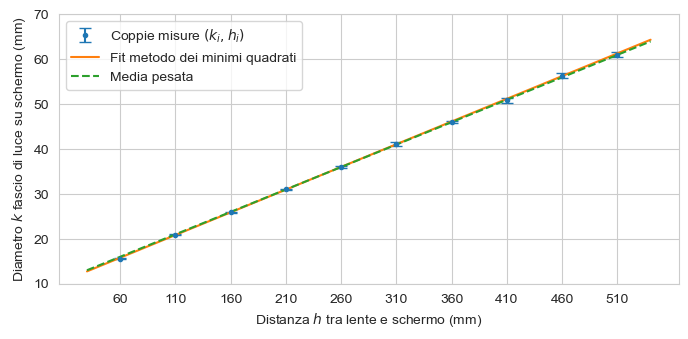

In [25]:
plot_kh(ki, ki_sig, fit_w, f, 'all')